In [1]:
# Load libraries
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import gvar as gv
from matplotlib.pyplot import figure
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
# Read response functions from file
nwR=5000
nq=25
wR=np.zeros(nwR)
qR=np.zeros(nq)
qR=np.asarray([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 
               1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
               2100,2200, 2300, 2400, 2500])

In [3]:
# Read one-body responses
R00_cc_1b_dip=np.zeros( (nwR, nq, 3) )
R0z_cc_1b_dip=np.zeros( (nwR, nq, 3) )
Rzz_cc_1b_dip=np.zeros( (nwR, nq, 3) )
Rxx_cc_1b_dip=np.zeros( (nwR, nq, 3) )
Rxy_cc_1b_dip=np.zeros( (nwR, nq, 3) )
R00_cc_12b_dip=np.zeros( (nwR, nq, 3) )
R0z_cc_12b_dip=np.zeros( (nwR, nq, 3) )
Rzz_cc_12b_dip=np.zeros( (nwR, nq, 3) )
Rxx_cc_12b_dip=np.zeros( (nwR, nq, 3) )
Rxy_cc_12b_dip=np.zeros( (nwR, nq, 3) )

R00_vec_1b=np.zeros( (nwR, nq, 3) )
R0z_vec_1b=np.zeros( (nwR, nq, 3) )
Rzz_vec_1b=np.zeros( (nwR, nq, 3) )
Rxx_vec_1b=np.zeros( (nwR, nq, 3) )
Rxy_vec_1b=np.zeros( (nwR, nq, 3) )
R00_vec_12b=np.zeros( (nwR, nq, 3) )
R0z_vec_12b=np.zeros( (nwR, nq, 3) )
Rzz_vec_12b=np.zeros( (nwR, nq, 3) )
Rxx_vec_12b=np.zeros( (nwR, nq, 3) )
Rxy_vec_12b=np.zeros( (nwR, nq, 3) )
R00_ax_1b=np.zeros( (nwR, nq, 3) )
R0z_ax_1b=np.zeros( (nwR, nq, 3) )
Rzz_ax_1b=np.zeros( (nwR, nq, 3) )
Rxx_ax_1b=np.zeros( (nwR, nq, 3) )
Rxy_ax_1b=np.zeros( (nwR, nq, 3) )
R00_ax_12b=np.zeros( (nwR, nq, 3) )
R0z_ax_12b=np.zeros( (nwR, nq, 3) )
Rzz_ax_12b=np.zeros( (nwR, nq, 3) )
Rxx_ax_12b=np.zeros( (nwR, nq, 3) )
Rxy_ax_12b=np.zeros( (nwR, nq, 3) )

qname = ['q_100/', 'q_200/', 'q_300/', 'q_400/', 'q_500/','q_600/', 'q_700/']
fname_cc_00_1b = []
fname_cc_0z_1b = []
fname_cc_zz_1b = []
fname_cc_xx_1b = []
fname_cc_xy_1b = []
fname_cc_00_12b = []
fname_cc_0z_12b = []
fname_cc_zz_12b = []
fname_cc_xx_12b = []
fname_cc_xy_12b = []
#
fname_vec_00_1b = []
fname_vec_0z_1b = []
fname_vec_zz_1b = []
fname_vec_xx_1b = []
fname_vec_xy_1b = []
fname_vec_00_12b = []
fname_vec_0z_12b = []
fname_vec_zz_12b = []
fname_vec_xx_12b = []
fname_vec_xy_12b = []
#ff = '_hohler/'
ff = 'c12_gfmc/'
for i in range (0,7):
    fname_cc_00_1b.append(ff + qname [i] + 'nc_rr_1b.out') 
    fname_cc_0z_1b.append(ff + qname [i] + 'nc_0z_1b.out') 
    fname_cc_zz_1b.append(ff + qname [i] + 'nc_zz_1b.out') 
    fname_cc_xx_1b.append(ff + qname [i] + 'nc_xx_1b.out') 
    fname_cc_xy_1b.append(ff + qname [i] + 'nc_xy_1b.out') 
    fname_cc_00_12b.append( ff + qname [i] + 'nc_rr_12b.out') 
    fname_cc_0z_12b.append(ff + qname [i] + 'nc_0z_12b.out') 
    fname_cc_zz_12b.append(ff + qname [i] + 'nc_zz_12b.out') 
    fname_cc_xx_12b.append(ff + qname [i] + 'nc_xx_12b.out') 
    fname_cc_xy_12b.append(ff + qname [i] + 'nc_xy_12b.out') 
for i in range (0,7):
    data_cc_00_1b = np.loadtxt(fname_cc_00_1b[i], unpack=True, skiprows=1)
    data_cc_0z_1b = np.loadtxt(fname_cc_0z_1b[i], unpack=True, skiprows=1)
    data_cc_zz_1b = np.loadtxt(fname_cc_zz_1b[i], unpack=True, skiprows=1)
    data_cc_xx_1b = np.loadtxt(fname_cc_xx_1b[i], unpack=True, skiprows=1) 
    data_cc_xy_1b = np.loadtxt(fname_cc_xy_1b[i], unpack=True, skiprows=1)    
    data_cc_00_12b = np.loadtxt(fname_cc_00_12b[i], unpack=True, skiprows=1)
    data_cc_0z_12b = np.loadtxt(fname_cc_0z_12b[i], unpack=True, skiprows=1)
    data_cc_zz_12b = np.loadtxt(fname_cc_zz_12b[i], unpack=True, skiprows=1)
    data_cc_xx_12b = np.loadtxt(fname_cc_xx_12b[i], unpack=True, skiprows=1)  
    data_cc_xy_12b = np.loadtxt(fname_cc_xy_12b[i], unpack=True, skiprows=1)   
    wR[:]=data_cc_00_1b[0,:]
    for j in range (3):
        R00_cc_1b_dip[:,i,j]=data_cc_00_1b[j+1,:]
        R0z_cc_1b_dip[:,i,j]=data_cc_0z_1b[j+1,:]
        Rzz_cc_1b_dip[:,i,j]=data_cc_zz_1b[j+1,:]
        Rxx_cc_1b_dip[:,i,j]=data_cc_xx_1b[j+1,:]
        Rxy_cc_1b_dip[:,i,j]=data_cc_xy_1b[j+1,:]               
        R00_cc_12b_dip[:,i,j]=data_cc_00_12b[j+1,:]
        R0z_cc_12b_dip[:,i,j]=data_cc_0z_12b[j+1,:]
        Rzz_cc_12b_dip[:,i,j]=data_cc_zz_12b[j+1,:]
        Rxx_cc_12b_dip[:,i,j]=data_cc_xx_12b[j+1,:]  
        Rxy_cc_12b_dip[:,i,j]=data_cc_xy_12b[j+1,:]    
#
for i in range (0,7):
    fname_vec_00_1b.append(ff + qname [i] + 'vect_rr_1b.out') 
    fname_vec_0z_1b.append(ff + qname [i] + 'vect_0z_1b.out') 
    fname_vec_zz_1b.append(ff + qname [i] + 'vect_zz_1b.out') 
    fname_vec_xx_1b.append(ff + qname [i] + 'vect_xx_1b.out') 
    fname_vec_xy_1b.append(ff + qname [i] + 'vect_xy_1b.out') 
    fname_vec_00_12b.append( ff + qname [i] + 'vect_rr_12b.out') 
    fname_vec_0z_12b.append(ff + qname [i] + 'vect_0z_12b.out') 
    fname_vec_zz_12b.append(ff + qname [i] + 'vect_zz_12b.out') 
    fname_vec_xx_12b.append(ff + qname [i] + 'vect_xx_12b.out') 
    fname_vec_xy_12b.append(ff + qname [i] + 'vect_xy_12b.out') 
for i in range (0,7):
    data_vec_00_1b = np.loadtxt(fname_vec_00_1b[i], unpack=True, skiprows=1)
    data_vec_0z_1b = np.loadtxt(fname_vec_0z_1b[i], unpack=True, skiprows=1)
    data_vec_zz_1b = np.loadtxt(fname_vec_zz_1b[i], unpack=True, skiprows=1)
    data_vec_xx_1b = np.loadtxt(fname_vec_xx_1b[i], unpack=True, skiprows=1) 
    data_vec_xy_1b = np.loadtxt(fname_vec_xy_1b[i], unpack=True, skiprows=1)    
    data_vec_00_12b = np.loadtxt(fname_vec_00_12b[i], unpack=True, skiprows=1)
    data_vec_0z_12b = np.loadtxt(fname_vec_0z_12b[i], unpack=True, skiprows=1)
    data_vec_zz_12b = np.loadtxt(fname_vec_zz_12b[i], unpack=True, skiprows=1)
    data_vec_xx_12b = np.loadtxt(fname_vec_xx_12b[i], unpack=True, skiprows=1)  
    data_vec_xy_12b = np.loadtxt(fname_vec_xy_12b[i], unpack=True, skiprows=1)   

    for j in range (3):
        R00_vec_1b[:,i,j]=data_vec_00_1b[j+1,:]
        R0z_vec_1b[:,i,j]=data_vec_0z_1b[j+1,:]
        Rzz_vec_1b[:,i,j]=data_vec_zz_1b[j+1,:]
        Rxx_vec_1b[:,i,j]=data_vec_xx_1b[j+1,:]
        Rxy_vec_1b[:,i,j]=data_vec_xy_1b[j+1,:]               
        R00_vec_12b[:,i,j]=data_vec_00_12b[j+1,:]
        R0z_vec_12b[:,i,j]=data_vec_0z_12b[j+1,:]
        Rzz_vec_12b[:,i,j]=data_vec_zz_12b[j+1,:]
        Rxx_vec_12b[:,i,j]=data_vec_xx_12b[j+1,:]  
        Rxy_vec_12b[:,i,j]=data_vec_xy_12b[j+1,:]             

In [4]:
R00_ax_1b = R00_cc_1b_dip - R00_vec_1b
R0z_ax_1b = R0z_cc_1b_dip - R0z_vec_1b
Rzz_ax_1b = Rzz_cc_1b_dip - Rzz_vec_1b
Rxx_ax_1b = Rxx_cc_1b_dip - Rxx_vec_1b
Rxy_ax_1b = Rxy_cc_1b_dip - Rxy_vec_1b
R00_ax_12b = R00_cc_12b_dip - R00_vec_12b
R0z_ax_12b = R0z_cc_12b_dip - R0z_vec_12b
Rzz_ax_12b = Rzz_cc_12b_dip - Rzz_vec_12b
Rxx_ax_12b = Rxx_cc_12b_dip - Rxx_vec_12b
Rxy_ax_12b = Rxy_cc_12b_dip - Rxy_vec_12b

#Fixing w dependence in the zz and 0z channels

for i in range (0,7):
    for j in range (nwR):
        Rzz_vec_1b[j,i,:]=(wR[j]/qR[i])**2*R00_vec_1b[j,i,:]
        R0z_vec_1b[j,i,:]=2*(wR[j]/qR[i])*R00_vec_1b[j,i,:]
        Rzz_vec_12b[j,i,:]=(wR[j]/qR[i])**2*R00_vec_12b[j,i,:]
        R0z_vec_12b[j,i,:]=2*(wR[j]/qR[i])*R00_vec_12b[j,i,:]
        #
        Rzz_cc_1b_dip[j,i,:]=Rzz_vec_1b[j,i,:]+Rzz_ax_1b[j,i,:]
        R0z_cc_1b_dip[j,i,:]=R0z_vec_1b[j,i,:]+R0z_ax_1b[j,i,:]
        Rzz_cc_12b_dip[j,i,:]=Rzz_vec_12b[j,i,:]+Rzz_ax_12b[j,i,:]
        R0z_cc_12b_dip[j,i,:]=R0z_vec_12b[j,i,:]+R0z_ax_12b[j,i,:]
        

        #  R_zz(1,:,i)=(w(i)/qval)**2*R_00(1,:,i)
       #R_0z(1,:,i)=2.0d0*(w(i)/qval)*R_00(1,:,i)
       #R_zz(3,:,i)=R_zz(2,:,i)+R_zz(1,:,i)
       #R_0z(3,:,i)=R_0z(2,:,i)+R_0z(1,:,i)


In [5]:
# here is the *BIG* chunk of code where i define everything that I need to make my
# axial form factor as a function of z

# defining some of my useful constants and functions
# q^2 values
qtmin = 0.0
qtmax = 3.0
qdt = 0.01
t1 = np.arange(qtmin, qtmax, qdt)

# constants from 1603.03048
# m_A^2 (GeV)
mA2 = gv.gvar(1.014, .014)
mean_mA2 = gv.mean(gv.gvar(1.014, .014))
# converting m_A^2 to MeV
#mA2 = mA2 * 1000
#mean_mA2 = mean_mA2 * 1000
# t_0^optimal (GeV^2) (eq. 15, pg. 5)
t0 = -0.28
# converting t_0 to MeV^2
#t0 = t0 * (1000**2)
# t_cut = 9*m_pi**2 \approx 0.18 GeV**2 (found just above equation 12)
tcut = 0.18
# converting t_cut to MeV^2
#tcut = tcut * (1000**2)
# F_A(0) = g_A (unitless) (found below equation 35 on pg. 12)
FA0 = 1.2723

###
# i define all my functions as functions of Q^2, ignoring the fact the equations are defined with q^2
###

# defining the z-expansion for Q^2
def z_exp(Qsquared):
    num = np.sqrt(tcut + Qsquared) - np.sqrt(tcut - t0)
    den = np.sqrt(tcut + Qsquared) + np.sqrt(tcut - t0)
    return num/den
# for this, use wolfram to solve the above for q^2 (very easy)
# and qsquared = Q^2 = -q^2
def qsquared(z):
    num = t0 + 2*t0*z - 4*tcut*z + t0*(z**2)
    den = (z - 1)**2
    return -num/den

# defining and using the correlation matrix
Cij = np.array([[1, 0.350, -0.678, 0.611], 
       [0.350, 1, -0.898, 0.367], 
       [-0.678, -0.898, 1, -0.685], 
       [0.611, 0.367, -0.685, 1]])
weights = np.diag([0.13, 1.0, 2.5, 2.7])
cov_ij = np.dot(weights, np.dot(Cij, weights))
#print(cov_ij)

# defining the parameters a_1-a_4 for the F_A(z) equation
mean_coeffs = [-2.3, 0.6, 3.8, -2.3]
coeffs = gv.gvar(mean_coeffs, cov_ij)

# using equation 16 and F(q2=0)=g_A constraint
# 5 equations, 5 unknowns
# bside comes from gv.linalg.solve notes
def bside(p):
    vector = [gv.gvar(1.2723,0), 0, 0, 0, 0]
    zval = z_exp(0)
    # first row of vector b
    sum0 = vector[0]
    for k in range(4):
        sum0 -= p[k]*z_exp(0)**(k+1)
    # second row of vector b
    sum1 = vector[1]
    for k in range(4):
        sum1 += p[k]
    # third row of vector b
    sum2 = vector[2]
    for k in range(4):
        kk=k+1
        sum2 += kk*p[k]
    # fourth row of vector b
    sum3 = vector[3]
    for k in range(4):
        kk=k+1
        sum3 += kk*(kk-1)*p[k]
    # fifth row of vector b
    sum4 = vector[4]
    for k in range(4):
        kk=k+1
        sum4 += kk*(kk-1)*(kk-2)*p[k]
    return [sum0, -sum1, -sum2, -sum3, -sum4]

# aside comes from gv.linalg.solve notes
def aside():
    matrix = np.zeros((5,5))
    # first row of matrix a
    matrix[0][0] = z_exp(0)**0
    for k in range(4):
        kplus = k+5
        matrix[0][k+1] = z_exp(0)**kplus
    # second row of matrix a
    matrix[1][0] = 1
    for k in range(4):
        kplus = k+5
        matrix[1][k+1] = 1
    # third row of matrix a
    matrix[2][0] = 0
    for k in range(4):
        kplus = k+5
        matrix[2][k+1] = kplus
    # fourth row of matrix a
    matrix[3][0] = 0
    for k in range(4):
        kplus = k+5
        matrix[3][k+1] = kplus * (kplus - 1)
    # fifth row of matrix a
    matrix[4][0] = 0
    for k in range(4):
        kplus = k+5
        matrix[4][k+1] = kplus * (kplus - 1) * (kplus - 2)
    return matrix
#print(aside())

# equation 9 for FA(-Q**2) and FA(z)
def FAdipq(Qsquared, mA2):
    return FA0 * (1 + (Qsquared / mA2))**-2
def FAdipz(z, mA2):
    Qsqr = qsquared(z)
    return FA0 * (1 + (Qsqr / mA2))**-2

# equation 13 for FA(-Q**2) and FA(z)
def FAzq(Q2, p):
    zval = z_exp(Q2)
    vector = bside(p)
    matrix = aside()
    parameter_vector = gv.linalg.solve(matrix, vector)
    #print('q'+str(parameter_vector))
    retval = 0
    # adding the a0 term
    retval += parameter_vector[0]
    # adding terms a1, a2, a3, a4
    for k in range(len(p)):
        retval += zval**(k+1) * p[k]
    # adding terms a5, a6, a7, a8
    for k in range(4):
        kplus = k+4
        # parameter_vector[k+1] has k+1, because parameter_vector[0] is already covered above
        retval += zval**(kplus)*parameter_vector[k+1]
    return retval
def FAzz(z, p):
    vector = bside(p)
    matrix = aside()
    parameter_vector = gv.linalg.solve(matrix, vector)
    #print('z'+str(gv.mean(parameter_vector)))
    # parameter vector gives me {a0, a5, a6, a7, a8}
    retval = 0
    # adding the a0 term
    retval += parameter_vector[0]
    # adding terms a1, a2, a3, a4
    for k in range(len(p)):
        retval += z_exp**(k+1) * p[k]
    # adding terms a5, a6, a7, a8
    for k in range(4):
        kplus = k+4
        # parameter_vector[k+1] has k+1, because parameter_vector[0] is already covered above
        retval += z_exp**(kplus)*parameter_vector[k+1]
    return retval

## Scaling analysis
Here we analyze how the response functions scale to obtain responses at q > 700 MeV/c. Instead of using the Fermi Gas scaling factors, we utilize those obtained from PWIA calculations 

In [6]:
eps=40.
mn=938.95
mpi=139.
kF=260.
y=np.zeros((nwR,nq))
for i in range (nwR):
    for j in range (nq):
        y[i,j]=mn/qR[j]/kF*(wR[i]-qR[j]**2/2/mn-eps)

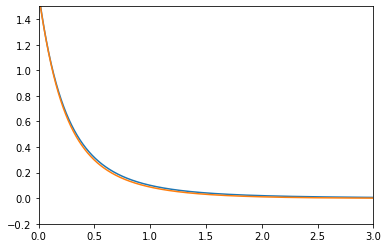

In [7]:
fname = 'ff_kelly.dat'
data = np.loadtxt(fname, unpack=True, skiprows=0)
nQ2 = len(data[0,:])
Q2 =  np.zeros(nQ2)
ges = np.zeros(nQ2)
gms = np.zeros(nQ2)
gev = np.zeros(nQ2)
gmv = np.zeros(nQ2)
ga = np.zeros(nQ2)
Q2 = data[0,:]
ges = data[1,:]
gms = data[2,:]
gev = data[3,:]
gmv = data[4,:]
ga = data[5,:]
#plt.plot(Q2/10**6,gev**2, color='blue')
plt.plot(Q2/10**6,ga**2 )
#plt.plot(Q2/10**6,gmv**2, color='red' )
#plt.yscale('log')

# plotting my axial form factor
plt.plot(Q2/10**6, gv.mean(FAzq(Q2/10**6, coeffs))**2)

# plotting the fractional difference
#plt.plot(Q2/10**6, (-gv.mean(FAzq(Q2/10**6, coeffs))**2 + ga**2)/ga**2)

plt.xlim(0.0, 3.0)
plt.ylim(-0.2, 1.5)
plt.show()

In [8]:
from scipy import interpolate
ges_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ges)
gms_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, gms)
gev_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, gev)
gmv_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, gmv)
ga_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga)

In [9]:
# creating interpolates from the axial form factors that i defined

# the ga in the interpolate is a list of numbers, so i need to create a list of numbers for my z-exp and my dipole
ga_zq = gv.mean(FAzq(Q2/10**6, coeffs))
ga_dipq = gv.mean(FAdipq(Q2/10**6, mA2))

# and doing the interpolations
ga_zq_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga_zq)
ga_dipq_interpolate = interpolate.InterpolatedUnivariateSpline(Q2, ga_dipq)

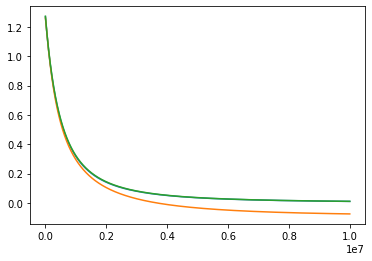

In [10]:
plt.plot(Q2, ga)
plt.plot(Q2, ga_zq)
plt.plot(Q2, ga_dipq)
plt.show()

In [11]:
wqe = np.sqrt(qR**2+mn**2)-mn
Q2qe = qR**2 - wqe**2
tauqe = Q2qe/4/mn**2

In [12]:
# creating the arrays for the response functions for the z-expansion
R00_cc_1b_zexp = np.zeros((nwR, nq, 3))
R0z_cc_1b_zexp = np.zeros((nwR, nq, 3))
Rzz_cc_1b_zexp = np.zeros((nwR, nq, 3))
Rxx_cc_1b_zexp = np.zeros((nwR, nq, 3))
R00_cc_12b_zexp = np.zeros((nwR, nq, 3))
R0z_cc_12b_zexp = np.zeros((nwR, nq, 3))
Rzz_cc_12b_zexp = np.zeros((nwR, nq, 3))
Rxx_cc_12b_zexp = np.zeros((nwR, nq, 3))
Rxy_cc_1b_zexp = np.zeros((nwR, nq, 3))
Rxy_cc_12b_zexp = np.zeros((nwR, nq, 3))

In [13]:
# creating empty arrays to fill with *ONLY* the vector components of the response functions
R00_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
R0z_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
Rzz_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
Rxx_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
R00_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))
R0z_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))
Rzz_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))
Rxx_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))
Rxy_cc_1b_dip_just_vector = np.zeros((nwR, nq, 3))
Rxy_cc_12b_dip_just_vector = np.zeros((nwR, nq, 3))

In [14]:
for i in range (nq):
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    #print('Q2qe: '+str(Q2qe))
    Gev_qe = gev_interpolate(Q2qe)
    Gmv_qe = gmv_interpolate(Q2qe)
    GA_qe = ga_interpolate(Q2qe)
    #print('Gev_qe: '+str(Gev_qe))
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        Gmvj = gmv_interpolate(Q2j)
        # defining both the dipole and the z-expansion versions
        GAj_dip = ga_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        #if j == 5:
        #    print('Gs')
        #    print(qR[i])
        #    print(GAj_dip)
        #    print(GAj_zexp)
        
        f_V=Gevj**2/Gev_qe**2
        f_VM=Gmvj**2/Gmv_qe**2
        # defining both the dipole and the z-expansion versions
        f_A_dip = GAj_dip**2/GA_qe**2
        f_A_zexp = GAj_zexp**2/GA_qe**2
        #if j == 5:
        #    print('fs')
        #    #print(Q2j)
        #    print(f_A_dip)
        #    print(f_A_zexp)
        
        # first defining all the dipole response functions
        #print(R00_vec_1b[j,i,:]*f_V)
        R00_cc_1b_dip[j,i,:]=R00_vec_1b[j,i,:]*f_V+R00_ax_1b[j,i,:]*f_A_dip
        Rxx_cc_1b_dip[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM+Rxx_ax_1b[j,i,:]*f_A_dip
        Rzz_cc_1b_dip[j,i,:]=Rzz_vec_1b[j,i,:]*f_V+Rzz_ax_1b[j,i,:]*f_A_dip
        R0z_cc_1b_dip[j,i,:]=R0z_vec_1b[j,i,:]*f_V+R0z_ax_1b[j,i,:]*f_A_dip
        Rxy_cc_1b_dip[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_A_dip)*np.sqrt(f_VM)
        #
        R00_cc_12b_dip[j,i,:]=R00_vec_12b[j,i,:]*f_V+R00_ax_12b[j,i,:]*f_A_dip
        Rxx_cc_12b_dip[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM+Rxx_ax_12b[j,i,:]*f_A_dip
        Rzz_cc_12b_dip[j,i,:]=Rzz_vec_12b[j,i,:]*f_V+Rzz_ax_12b[j,i,:]*f_A_dip
        R0z_cc_12b_dip[j,i,:]=R0z_vec_12b[j,i,:]*f_V+R0z_ax_12b[j,i,:]*f_A_dip
        Rxy_cc_12b_dip[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_A_dip)*np.sqrt(f_VM)
        
        # next definining all the z-expansion response functions
        R00_cc_1b_zexp[j,i,:]=R00_vec_1b[j,i,:]*f_V+R00_ax_1b[j,i,:]*f_A_zexp
        Rxx_cc_1b_zexp[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM+Rxx_ax_1b[j,i,:]*f_A_zexp
        Rzz_cc_1b_zexp[j,i,:]=Rzz_vec_1b[j,i,:]*f_V+Rzz_ax_1b[j,i,:]*f_A_zexp
        R0z_cc_1b_zexp[j,i,:]=R0z_vec_1b[j,i,:]*f_V+R0z_ax_1b[j,i,:]*f_A_zexp
        Rxy_cc_1b_zexp[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_A_zexp)*np.sqrt(f_VM)
        #
        R00_cc_12b_zexp[j,i,:]=R00_vec_12b[j,i,:]*f_V+R00_ax_12b[j,i,:]*f_A_zexp
        Rxx_cc_12b_zexp[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM+Rxx_ax_12b[j,i,:]*f_A_zexp
        Rzz_cc_12b_zexp[j,i,:]=Rzz_vec_12b[j,i,:]*f_V+Rzz_ax_12b[j,i,:]*f_A_zexp
        R0z_cc_12b_zexp[j,i,:]=R0z_vec_12b[j,i,:]*f_V+R0z_ax_12b[j,i,:]*f_A_zexp
        Rxy_cc_12b_zexp[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_A_zexp)*np.sqrt(f_VM)
        
        # next defining only the vector components of the response functions
        R00_cc_1b_dip_just_vector[j,i,:]=R00_vec_1b[j,i,:]*f_V
        Rxx_cc_1b_dip_just_vector[j,i,:]= Rxx_vec_1b[j,i,:]*f_VM
        Rzz_cc_1b_dip_just_vector[j,i,:]=Rzz_vec_1b[j,i,:]*f_V
        R0z_cc_1b_dip_just_vector[j,i,:]=R0z_vec_1b[j,i,:]*f_V
        Rxy_cc_1b_dip_just_vector[j,i,:]=Rxy_cc_1b_dip[j,i,:]*np.sqrt(f_VM)
        #
        R00_cc_12b_dip_just_vector[j,i,:]=R00_vec_12b[j,i,:]*f_V
        Rxx_cc_12b_dip_just_vector[j,i,:]=Rxx_vec_12b[j,i,:]*f_VM
        Rzz_cc_12b_dip_just_vector[j,i,:]=Rzz_vec_12b[j,i,:]*f_V
        R0z_cc_12b_dip_just_vector[j,i,:]=R0z_vec_12b[j,i,:]*f_V
        Rxy_cc_12b_dip_just_vector[j,i,:]=Rxy_cc_12b_dip[j,i,:]*np.sqrt(f_VM)

In [15]:
#1/0

## $R_{00}$ - one body

In [16]:
eps=50.
mn=939.
mpi=139.
kF=260.
mstar=1.0
y=np.zeros((nwR,nq))
for i in range (nwR):
    for j in range (nq):
        y[i,j]=mn/qR[j]/kF*(wR[i]-qR[j]**2/2/(mn*mstar)-eps)
G00_vc = np.zeros((nq,nwR))
G00_ac = np.zeros((nq,nwR))
G00_cc_dip = np.zeros((nq,nwR))
G00_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        G00_vc[i,j] = (((Gen-Gep-2*Gmn+2*Gmp)**2*(kF-pG)*(kF+pG)*qR[i]**2)/(32*mn**4)+(Gen-Gep)**2/(1+tauqe[i]))/qR[i]
        G00_ac[i,j] = ((GA**2*(2*(kF**2+pG**2)+4*pG*qR[i]+qR[i]**2))/(4*mn**2)-(GA*gps*qR[i]*(2*pG+qR[i])*wqe[i])/mn
                    + gps**2*qR[i]**2*wqe[i]**2)/qR[i]
        G00_cc_dip[i,j] = G00_vc[i,j]*Gevj**2/Gev**2 + G00_ac[i,j]*GAj_dip**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G00_cc_min_dip[i] = G00_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            G00_cc_dip[i,j] = G00_cc_min_dip[i]
        G00_cc_dip[i,j] = G00_cc_dip[i,j] / kF * ( mn * 6 ) 

In [17]:
# now looking at the z-case for R00

# making the G00_cc arrays for the z-expansion case
G00_cc_zexp = np.zeros((nq,nwR))
G00_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        G00_cc_zexp[i,j] = G00_vc[i,j]*Gevj**2/Gev**2 + G00_ac[i,j]*GAj_zexp**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G00_cc_min_zexp[i] = G00_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            G00_cc_zexp[i,j] = G00_cc_min_zexp[i]
        G00_cc_zexp[i,j] = G00_cc_zexp[i,j] / kF * ( mn * 6 ) 

In [18]:
R00_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_1b_dip[:,6,2]/G00_cc_dip[6,:])
R00_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_1b_dip[:,5,2]/G00_cc_dip[5,:])

R00_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_1b_zexp[:,6,2]/G00_cc_zexp[6,:])
R00_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_1b_zexp[:,5,2]/G00_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R00_cc_1b_dip[i,j,0] = R00_cc_1b_interpolate_600_dip(y[i,j])*G00_cc_dip[j,i]
        R00_cc_1b_dip[i,j,2] = R00_cc_1b_interpolate_700_dip(y[i,j])*G00_cc_dip[j,i]
        err_dip =  2 * (R00_cc_1b_dip[i,j,2] - R00_cc_1b_dip[i,j,0])
        R00_cc_1b_dip[i,j,1] = R00_cc_1b_dip[i,j,2] + err_dip
        R00_cc_1b_dip[i,j,0] = R00_cc_1b_dip[i,j,2] - err_dip
        
        R00_cc_1b_zexp[i,j,0] = R00_cc_1b_interpolate_600_zexp(y[i,j])*G00_cc_zexp[j,i]
        R00_cc_1b_zexp[i,j,2] = R00_cc_1b_interpolate_700_zexp(y[i,j])*G00_cc_zexp[j,i]
        err_zexp =  2 * (R00_cc_1b_zexp[i,j,2] - R00_cc_1b_zexp[i,j,0])
        R00_cc_1b_zexp[i,j,1] = R00_cc_1b_zexp[i,j,2] + err_zexp
        R00_cc_1b_zexp[i,j,0] = R00_cc_1b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            R00_cc_1b_dip[i,j,:] = 0
            R00_cc_1b_zexp[i,j,:] = 0
        for k in range(3):
            if R00_cc_1b_dip[i,j,k] < 0:  R00_cc_1b_dip[i,j,k] = 0
            if R00_cc_1b_zexp[i,j,k] < 0:  R00_cc_1b_zexp[i,j,k] = 0

## $R_{00}$ - one-two body

In [19]:
R00_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_12b_dip[:,6,2]/G00_cc_dip[6,:])
R00_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_12b_dip[:,5,2]/G00_cc_dip[5,:])

R00_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R00_cc_12b_zexp[:,6,2]/G00_cc_zexp[6,:])
R00_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R00_cc_12b_zexp[:,5,2]/G00_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R00_cc_12b_dip[i,j,0] = R00_cc_12b_interpolate_600_dip(y[i,j])*G00_cc_dip[j,i]
        R00_cc_12b_dip[i,j,2] = R00_cc_12b_interpolate_700_dip(y[i,j])*G00_cc_dip[j,i]
        err_dip = 2 * (R00_cc_12b_dip[i,j,2] - R00_cc_12b_dip[i,j,0])
        R00_cc_12b_dip[i,j,1] = R00_cc_12b_dip[i,j,2] + err_dip
        R00_cc_12b_dip[i,j,0] = R00_cc_12b_dip[i,j,2] - err_dip
        
        R00_cc_12b_zexp[i,j,0] = R00_cc_12b_interpolate_600_zexp(y[i,j])*G00_cc_zexp[j,i]
        R00_cc_12b_zexp[i,j,2] = R00_cc_12b_interpolate_700_zexp(y[i,j])*G00_cc_zexp[j,i]
        err_zexp = 2 * (R00_cc_12b_zexp[i,j,2] - R00_cc_12b_zexp[i,j,0])
        R00_cc_12b_zexp[i,j,1] = R00_cc_12b_zexp[i,j,2] + err_zexp
        R00_cc_12b_zexp[i,j,0] = R00_cc_12b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            R00_cc_12b_dip[i,j,:] = 0
            R00_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if R00_cc_12b_dip[i,j,k] < 0:  R00_cc_12b_dip[i,j,k] = 0
            if R00_cc_12b_zexp[i,j,k] < 0:  R00_cc_12b_zexp[i,j,k] = 0

## $R_{0z}$ - one body

In [20]:
G0z_vc = np.zeros((nq,nwR))
G0z_ac = np.zeros((nq,nwR))
G0z_cc_dip = np.zeros((nq,nwR))
G0z_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2-wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > 3*kF: pG = 3*kF
        G0z_vc[i,j] = wR[j]/qR[i]*G00_vc[i,j]
        G0z_ac[i,j] = ((GA**2*(4*mn**2*(2*pG+qR[i])+qR[i]*(kF**2+(pG+qR[i])*(3*pG+qR[i])))+8*gps**2*mn**3*qR[i]**3*wqe[i]
                    - 2*GA*gps*mn*qR[i]*(2*mn*qR[i]*(2*pG+qR[i])+(-kF**2+4*mn**2+(pG+qR[i])**2)*wqe[i]))/(8*mn**3))/qR[i]
        G0z_cc_dip[i,j] = G0z_vc[i,j]*Gevj**2/Gev**2 + G0z_ac[i,j]*GAj_dip**2/GA**2
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G0z_cc_min_dip[i] = G0z_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: G0z_cc_dip[i,j] = G0z_cc_min_dip[i]
        G0z_cc_dip[i,j] = G0z_cc_dip[i,j] / kF * ( mn * 6 ) 

In [21]:
# now looking at the z-case for R0z

# making the G0z_cc arrays for the z-expansion case
G0z_cc_zexp = np.zeros((nq,nwR))
G0z_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        G0z_cc_zexp[i,j] = G0z_vc[i,j]*Gevj**2/Gev**2 + G0z_ac[i,j]*GAj_zexp**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            G0z_cc_min_zexp[i] = G0z_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            G0z_cc_zexp[i,j] = G0z_cc_min_zexp[i]
        G0z_cc_zexp[i,j] = G0z_cc_zexp[i,j] / kF * ( mn * 6 ) 

In [22]:
R0z_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_1b_dip[:,6,2]/G0z_cc_dip[6,:])
R0z_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_1b_dip[:,5,2]/G0z_cc_dip[5,:])

R0z_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_1b_zexp[:,6,2]/G0z_cc_zexp[6,:])
R0z_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_1b_zexp[:,5,2]/G0z_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R0z_cc_1b_dip[i,j,0] = R0z_cc_1b_interpolate_600_dip(y[i,j])*G0z_cc_dip[j,i]
        R0z_cc_1b_dip[i,j,2] = R0z_cc_1b_interpolate_700_dip(y[i,j])*G0z_cc_dip[j,i]
        err_dip = 2 * (R0z_cc_1b_dip[i,j,2] - R0z_cc_1b_dip[i,j,0])
        R0z_cc_1b_dip[i,j,1] = R0z_cc_1b_dip[i,j,2] + err_dip
        R0z_cc_1b_dip[i,j,0] = R0z_cc_1b_dip[i,j,2] - err_dip
        
        R0z_cc_1b_zexp[i,j,0] = R0z_cc_1b_interpolate_600_zexp(y[i,j])*G0z_cc_zexp[j,i]
        R0z_cc_1b_zexp[i,j,2] = R0z_cc_1b_interpolate_700_zexp(y[i,j])*G0z_cc_zexp[j,i]
        err_zexp = 2 * (R0z_cc_1b_zexp[i,j,2] - R0z_cc_1b_zexp[i,j,0])
        R0z_cc_1b_zexp[i,j,1] = R0z_cc_1b_zexp[i,j,2] + err_zexp
        R0z_cc_1b_zexp[i,j,0] = R0z_cc_1b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            R0z_cc_1b_dip[i,j,:] = 0
            R0z_cc_1b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if R0z_cc_1b_dip[i,j,k] < 0:  R0z_cc_1b_dip[i,j,k] = 0
        #    if R0z_cc_1b_zexp[i,j,k] < 0:  R0z_cc_1b_zexp[i,j,k] = 0

## $R_{0z}$ - one+two body

In [23]:
R0z_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_12b_dip[:,6,2]/G0z_cc_dip[6,:])
R0z_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_12b_dip[:,5,2]/G0z_cc_dip[5,:])

R0z_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], R0z_cc_12b_zexp[:,6,2]/G0z_cc_zexp[6,:])
R0z_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], R0z_cc_12b_zexp[:,5,2]/G0z_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        R0z_cc_12b_dip[i,j,0] = R0z_cc_12b_interpolate_600_dip(y[i,j])*G0z_cc_dip[j,i]
        R0z_cc_12b_dip[i,j,2] = R0z_cc_12b_interpolate_700_dip(y[i,j])*G0z_cc_dip[j,i]
        err_dip = 2 * (R0z_cc_12b_dip[i,j,2] - R0z_cc_12b_dip[i,j,0])
        R0z_cc_12b_dip[i,j,1] = R0z_cc_12b_dip[i,j,2] + err_dip
        R0z_cc_12b_dip[i,j,0] = R0z_cc_12b_dip[i,j,2] - err_dip
        
        R0z_cc_12b_zexp[i,j,0] = R0z_cc_12b_interpolate_600_zexp(y[i,j])*G0z_cc_zexp[j,i]
        R0z_cc_12b_zexp[i,j,2] = R0z_cc_12b_interpolate_700_zexp(y[i,j])*G0z_cc_zexp[j,i]
        err_zexp = 2 * (R0z_cc_12b_zexp[i,j,2] - R0z_cc_12b_zexp[i,j,0])
        R0z_cc_12b_zexp[i,j,1] = R0z_cc_12b_zexp[i,j,2] + err_zexp
        R0z_cc_12b_zexp[i,j,0] = R0z_cc_12b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            R0z_cc_12b_dip[i,j,:] = 0
            R0z_cc_12b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if R0z_cc_12b_dip[i,j,k] < 0:  R0z_cc_12b_dip[i,j,k] = 0
        #    if R0z_cc_12b_zexp[i,j,k] < 0:  R0z_cc_12b_zexp[i,j,k] = 0

## $R_{zz}$ one body

In [24]:
Gzz_vc = np.zeros((nq,nwR))
Gzz_vc_qe = np.zeros((nq,nwR))
Gzz_ac = np.zeros((nq,nwR))
Gzz_cc_dip = np.zeros((nq,nwR))
Gzz_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA =  ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gzz_vc[i,j] = wR[j]**2/qR[i]**2*G00_vc[i,j]
        Gzz_ac[i,j] = (gps**2*qR[i]**4-(GA*gps*qR[i]**2*(-kF**2+4*mn**2+(pG+qR[i])**2))/(2*mn**2)
                    +(GA**2*(4*kF**4+48*mn**4-2*pG**4-2*kF**2*(12*mn**2+pG**2)+12*pG**2*qR[i]**2+12*pG*qR[i]**3
                    +3*qR[i]**4+24*mn**2*(pG+qR[i])**2))/(48.*mn**4))/qR[i]
        Gzz_cc_dip[i,j] = Gzz_vc[i,j]*Gevj**2/Gev**2 + Gzz_ac[i,j]*GAj_dip**2/GA**2
        if  y[j,i] > -0.8 and first_time == 1:
            first_time = 0
            Gzz_cc_min_dip[i] = Gzz_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.8: Gzz_cc_dip[i,j] = Gzz_cc_min_dip[i]
        Gzz_cc_dip[i,j] = Gzz_cc_dip[i,j] / kF * ( mn * 6 )     

C:\Users\dan16\AppData\Local\Temp\ipykernel_15988\1281888977.py:31: RuntimeWarning: overflow encountered in long_scalars
  +3*qR[i]**4+24*mn**2*(pG+qR[i])**2))/(48.*mn**4))/qR[i]


In [25]:
# now looking at the z-case for Rzz

# making the Gzz_cc arrays for the z-expansion case
Gzz_cc_zexp = np.zeros((nq,nwR))
Gzz_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gzz_cc_zexp[i,j] = Gzz_vc[i,j]*Gevj**2/Gev**2 + Gzz_ac[i,j]*GAj_zexp**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gzz_cc_min_zexp[i] = Gzz_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            Gzz_cc_zexp[i,j] = Gzz_cc_min_zexp[i]
        Gzz_cc_zexp[i,j] = Gzz_cc_zexp[i,j] / kF * ( mn * 6 ) 

In [26]:
Rzz_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_1b_dip[:,6,2]/Gzz_cc_dip[6,:])
Rzz_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_1b_dip[:,5,2]/Gzz_cc_dip[5,:])

Rzz_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_1b_zexp[:,6,2]/Gzz_cc_zexp[6,:])
Rzz_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_1b_zexp[:,5,2]/Gzz_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rzz_cc_1b_dip[i,j,0] = Rzz_cc_1b_interpolate_600_dip(y[i,j])*Gzz_cc_dip[j,i]
        Rzz_cc_1b_dip[i,j,2] = Rzz_cc_1b_interpolate_700_dip(y[i,j])*Gzz_cc_dip[j,i]
        err_dip = 2 * (Rzz_cc_1b_dip[i,j,2] - Rzz_cc_1b_dip[i,j,0])
        Rzz_cc_1b_dip[i,j,1] = Rzz_cc_1b_dip[i,j,2] + err_dip
        Rzz_cc_1b_dip[i,j,0] = Rzz_cc_1b_dip[i,j,2] - err_dip
        
        Rzz_cc_1b_zexp[i,j,0] = Rzz_cc_1b_interpolate_600_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        Rzz_cc_1b_zexp[i,j,2] = Rzz_cc_1b_interpolate_700_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        err_zexp = 2 * (Rzz_cc_1b_zexp[i,j,2] - Rzz_cc_1b_zexp[i,j,0])
        Rzz_cc_1b_zexp[i,j,1] = Rzz_cc_1b_zexp[i,j,2] + err_zexp
        Rzz_cc_1b_zexp[i,j,0] = Rzz_cc_1b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            Rzz_cc_1b_dip[i,j,:] = 0
            Rzz_cc_1b_zexp[i,j,:] = 0
        for k in range(3):
            if Rzz_cc_1b_dip[i,j,k] < 0:  Rzz_cc_1b_dip[i,j,k] = 0
            if Rzz_cc_1b_zexp[i,j,k] < 0:  Rzz_cc_1b_zexp[i,j,k] = 0

## $R_{zz}$ one+two body

In [27]:
Rzz_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_12b_dip[:,6,2]/G0z_cc_dip[6,:])
Rzz_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_12b_dip[:,5,2]/G0z_cc_dip[5,:])

Rzz_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rzz_cc_12b_zexp[:,6,2]/G0z_cc_zexp[6,:])
Rzz_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rzz_cc_12b_zexp[:,5,2]/G0z_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rzz_cc_12b_dip[i,j,0] = Rzz_cc_12b_interpolate_600_dip(y[i,j])*Gzz_cc_dip[j,i]
        Rzz_cc_12b_dip[i,j,2] = Rzz_cc_12b_interpolate_700_dip(y[i,j])*Gzz_cc_dip[j,i]
        err_dip = 2 * (Rzz_cc_12b_dip[i,j,2] - Rzz_cc_12b_dip[i,j,0])
        Rzz_cc_12b_dip[i,j,1] = Rzz_cc_12b_dip[i,j,2] + err_dip
        Rzz_cc_12b_dip[i,j,0] = Rzz_cc_12b_dip[i,j,2] - err_dip
        
        Rzz_cc_12b_zexp[i,j,0] = Rzz_cc_12b_interpolate_600_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        Rzz_cc_12b_zexp[i,j,2] = Rzz_cc_12b_interpolate_700_zexp(y[i,j])*Gzz_cc_zexp[j,i]
        err_zexp = 2 * (Rzz_cc_12b_zexp[i,j,2] - Rzz_cc_12b_zexp[i,j,0])
        Rzz_cc_12b_zexp[i,j,1] = Rzz_cc_12b_zexp[i,j,2] + err_zexp
        Rzz_cc_12b_zexp[i,j,0] = Rzz_cc_12b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < y[0,6]:
            Rzz_cc_12b_dip[i,j,:] = 0
            Rzz_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if Rzz_cc_12b_dip[i,j,k] < 0:  Rzz_cc_12b_dip[i,j,k] = 0
            if Rzz_cc_12b_zexp[i,j,k] < 0:  Rzz_cc_12b_zexp[i,j,k] = 0

## $R_{xx}$ one body

In [28]:
eps=50.
mn=939.
mpi=139.
kF=260.
mstar=1.0
y=np.zeros((nwR,nq))
for i in range (nwR):
    for j in range (nq):
        y[i,j]=mn/qR[j]/kF*(wR[i]-qR[j]**2/2/(mn*mstar)-eps)
Gxx_vc = np.zeros((nq,nwR))
Gxx_ac = np.zeros((nq,nwR))
Gxx_cc_dip = np.zeros((nq,nwR))
Gxx_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA =  ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxx_vc[i,j] =(((Gen-Gep)**2*(kF-pG)*(kF+pG)+(Gmn-Gmp)**2*qR[i]**2)/(4*mn**2))/qR[i]
        Gxx_ac[i,j] = ((GA**2*(2*kF**4+48*mn**4+5*pG**4+12*pG**3*qR[i]+18*pG**2*qR[i]**2+12*pG*qR[i]**3
                    + 3*qR[i]**4-12*mn**2*(3*pG**2+4*pG*qR[i]+2*qR[i]**2)+kF**2*(-12*mn**2+5*pG**2
                    + 12*pG*qR[i]+6*qR[i]**2)))/(48.*mn**4))/qR[i]
        Gxx_cc_dip[i,j] = Gxx_vc[i,j]*Gevj**2/Gev**2 + Gxx_ac[i,j]*GAj_dip**2/GA**2
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxx_cc_min_dip[i] = Gxx_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: Gxx_cc_dip[i,j] = Gxx_cc_min_dip[i]
        Gxx_cc_dip[i,j] = Gxx_cc_dip[i,j] / kF * ( mn * 12 ) 

C:\Users\dan16\AppData\Local\Temp\ipykernel_15988\847921882.py:38: RuntimeWarning: overflow encountered in long_scalars
  + 3*qR[i]**4-12*mn**2*(3*pG**2+4*pG*qR[i]+2*qR[i]**2)+kF**2*(-12*mn**2+5*pG**2


In [29]:
# now looking at the z-case for Rxx

# making the Gxx_cc arrays for the z-expansion case
Gxx_cc_zexp = np.zeros((nq,nwR))
Gxx_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxx_cc_zexp[i,j] = Gxx_vc[i,j]*Gevj**2/Gev**2 + Gxx_ac[i,j]*GAj_zexp**2/GA**2   
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxx_cc_min_zexp[i] = Gxx_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            Gxx_cc_zexp[i,j] = Gxx_cc_min_zexp[i]
        Gxx_cc_zexp[i,j] = Gxx_cc_zexp[i,j] / kF * ( mn * 12 ) 

In [30]:
Rxx_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_1b_dip[:,6,2]/Gxx_cc_dip[6,:])
Rxx_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_1b_dip[:,5,2]/Gxx_cc_dip[5,:])

Rxx_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_1b_zexp[:,6,2]/Gxx_cc_zexp[6,:])
Rxx_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_1b_zexp[:,5,2]/Gxx_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxx_cc_1b_dip[i,j,0] = Rxx_cc_1b_interpolate_600_dip(y[i,j])*Gxx_cc_dip[j,i]
        Rxx_cc_1b_dip[i,j,2] = Rxx_cc_1b_interpolate_700_dip(y[i,j])*Gxx_cc_dip[j,i]
        err_dip = 2 * (Rxx_cc_1b_dip[i,j,2] - Rxx_cc_1b_dip[i,j,0])
        Rxx_cc_1b_dip[i,j,1] = Rxx_cc_1b_dip[i,j,2] + err_dip
        Rxx_cc_1b_dip[i,j,0] = Rxx_cc_1b_dip[i,j,2] - err_dip
        
        Rxx_cc_1b_zexp[i,j,0] = Rxx_cc_1b_interpolate_600_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        Rxx_cc_1b_zexp[i,j,2] = Rxx_cc_1b_interpolate_700_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        err_zexp = 2 * (Rxx_cc_1b_zexp[i,j,2] - Rxx_cc_1b_zexp[i,j,0])
        Rxx_cc_1b_zexp[i,j,1] = Rxx_cc_1b_zexp[i,j,2] + err_zexp
        Rxx_cc_1b_zexp[i,j,0] = Rxx_cc_1b_zexp[i,j,2] - err_zexp
        
        if y[i,j] < -1.4:
            Rxx_cc_1b_dip[i,j,:] = 0
            Rxx_cc_1b_zexp[i,j,:] = 0
        for k in range(3):
            if Rxx_cc_1b_dip[i,j,k] < 0:  Rxx_cc_1b_dip[i,j,k] = 0
            if Rxx_cc_1b_zexp[i,j,k] < 0:  Rxx_cc_1b_zexp[i,j,k] = 0

## $R_{xx}$ one+two body

In [31]:
Rxx_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_12b_dip[:,6,2]/Gxx_cc_dip[6,:])
Rxx_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_12b_dip[:,5,2]/Gxx_cc_dip[5,:])
for j in range (7,nq):
    for i in range (nwR):
        Rxx_cc_12b_dip[i,j,0] = Rxx_cc_12b_interpolate_600_dip(y[i,j])*Gxx_cc_dip[j,i]
        Rxx_cc_12b_dip[i,j,2] = Rxx_cc_12b_interpolate_700_dip(y[i,j])*Gxx_cc_dip[j,i]
        err = 2 * (Rxx_cc_12b_dip[i,j,2] - Rxx_cc_12b_dip[i,j,0])
        Rxx_cc_12b_dip[i,j,1] = Rxx_cc_12b_dip[i,j,2] + err
        Rxx_cc_12b_dip[i,j,0] = Rxx_cc_12b_dip[i,j,2] - err
        if y[i,j] < -1.4:
            Rxx_cc_12b_dip[i,j,:] = 0
        for k in range(3):
            if Rxx_cc_12b_dip[i,j,k] < 0:  Rxx_cc_12b_dip[i,j,k] = 0
                
Rxx_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxx_cc_12b_zexp[:,6,2]/Gxx_cc_zexp[6,:])
Rxx_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxx_cc_12b_zexp[:,5,2]/Gxx_cc_zexp[5,:])
for j in range (7,nq):
    for i in range (nwR):
        Rxx_cc_12b_zexp[i,j,0] = Rxx_cc_12b_interpolate_600_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        Rxx_cc_12b_zexp[i,j,2] = Rxx_cc_12b_interpolate_700_zexp(y[i,j])*Gxx_cc_zexp[j,i]
        err = 2 * (Rxx_cc_12b_zexp[i,j,2] - Rxx_cc_12b_zexp[i,j,0])
        Rxx_cc_12b_zexp[i,j,1] = Rxx_cc_12b_zexp[i,j,2] + err
        Rxx_cc_12b_zexp[i,j,0] = Rxx_cc_12b_zexp[i,j,2] - err
        if y[i,j] < -1.4:
            Rxx_cc_12b_zexp[i,j,:] = 0
        for k in range(3):
            if Rxx_cc_12b_zexp[i,j,k] < 0:  Rxx_cc_12b_zexp[i,j,k] = 0

## $R_{xy}$ one body

In [32]:
Gxy_cc_dip = np.zeros((nq,nwR))
Gxy_cc_min_dip = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA =  ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_dip = ga_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxy_cc_dip[i,j] = (-(GA*(Gmn-Gmp)*qR[i]*(kF**2-8*mn**2+3*pG**2+4*pG*qR[i]+2*qR[i]**2))/(8*mn**3))/qR[i]
        Gxy_cc_dip[i,j] = Gxy_cc_dip[i,j]*Gevj/Gev*GAj_dip/GA
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxy_cc_min_dip[i] = Gxy_cc_dip[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: Gxy_cc_dip[i,j] = Gxy_cc_min_dip[i]        
        Gxy_cc_dip[i,j] = Gxy_cc_dip[i,j] / kF * ( mn * 12 ) 

In [33]:
# now looking at the z-case for Rxy

# making the Gxy_cc arrays for the z-expansion case
Gxy_cc_zexp = np.zeros((nq,nwR))
Gxy_cc_min_zexp = np.zeros(nq)
for i in range (nq):
    first_time = 1
    Q2qe = abs(qR[i]**2 - wqe[i]**2)
    Ges = ges_interpolate(Q2qe)
    Gev = gev_interpolate(Q2qe)
    Gmv = gmv_interpolate(Q2qe)
    Gms = gms_interpolate(Q2qe)
    GA = ga_interpolate(Q2qe)
    gps = GA / (mpi**2 + Q2qe)  
    Gen = (Ges - Gev) / 2
    Gep = (Ges + Gev) / 2
    Gmn = (Gms - Gmv) / 2
    Gmp = (Gms + Gmv) / 2
    for j in range (nwR):
        wj = wR[j]
        if wR[j] > qR[i] - 10:
            wj = qR[i] - 10
        Q2j = abs(qR[i]**2 - wj**2)
        Gevj = gev_interpolate(Q2j)
        GAj_zexp = ga_zq_interpolate(Q2j)
        pG = mn/qR[i]*(wR[j]-qR[i]**2/2/mn-eps)
        if pG > kF: pG = kF
        Gxy_cc_zexp[i,j] = (-(GA*(Gmn-Gmp)*qR[i]*(kF**2-8*mn**2+3*pG**2+4*pG*qR[i]+2*qR[i]**2))/(8*mn**3))/qR[i]
        Gxy_cc_zexp[i,j] = Gxy_cc_zexp[i,j]*Gevj/Gev*GAj_zexp/GA
        if  y[j,i] > -0.9 and first_time == 1:
            first_time = 0
            Gxy_cc_min_zexp[i] = Gxy_cc_zexp[i,j]   
for i in range (nq):
    for j in range (nwR):
        if  y[j,i] < -0.9: 
            Gxy_cc_zexp[i,j] = Gxy_cc_min_zexp[i]
        Gxy_cc_zexp[i,j] = Gxy_cc_zexp[i,j] / kF * ( mn * 12 ) 

In [34]:
Rxy_cc_1b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_1b_dip[:,6,2]/Gxy_cc_dip[6,:])
Rxy_cc_1b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_1b_dip[:,5,2]/Gxy_cc_dip[5,:])

Rxy_cc_1b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_1b_zexp[:,6,2]/Gxy_cc_zexp[6,:])
Rxy_cc_1b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_1b_zexp[:,5,2]/Gxy_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxy_cc_1b_dip[i,j,0] = Rxy_cc_1b_interpolate_600_dip(y[i,j])*Gxy_cc_dip[j,i]
        Rxy_cc_1b_dip[i,j,2] = Rxy_cc_1b_interpolate_700_dip(y[i,j])*Gxy_cc_dip[j,i]
        err_dip = 2 * (Rxy_cc_1b_dip[i,j,2] - Rxy_cc_1b_dip[i,j,0])
        Rxy_cc_1b_dip[i,j,1] = Rxy_cc_1b_dip[i,j,2] + err_dip
        Rxy_cc_1b_dip[i,j,0] = Rxy_cc_1b_dip[i,j,2] - err_dip
        
        Rxy_cc_1b_zexp[i,j,0] = Rxy_cc_1b_interpolate_600_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        Rxy_cc_1b_zexp[i,j,2] = Rxy_cc_1b_interpolate_700_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        err_zexp = 2 * (Rxy_cc_1b_zexp[i,j,2] - Rxy_cc_1b_zexp[i,j,0])
        Rxy_cc_1b_zexp[i,j,1] = Rxy_cc_1b_zexp[i,j,2] + err_zexp
        Rxy_cc_1b_zexp[i,j,0] = Rxy_cc_1b_zexp[i,j,2] - err_zexp
        
        #print(y[i,j])
        if y[i,j] < -1.4:
            Rxy_cc_1b_dip[i,j,:] = 0
            Rxy_cc_1b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if Rxy_cc_1b_dip[i,j,k] < 0:  Rxy_cc_1b_dip[i] = 0 
        #    if Rxy_cc_1b_zexp[i,j,k] < 0:  Rxy_cc_1b_zexp[i] = 0

## $R_{xy}$ one+two body

In [35]:
Rxy_cc_12b_interpolate_700_dip = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_12b_dip[:,6,2]/Gxy_cc_dip[6,:])
Rxy_cc_12b_interpolate_600_dip = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_12b_dip[:,5,2]/Gxy_cc_dip[5,:])

Rxy_cc_12b_interpolate_700_zexp = interpolate.InterpolatedUnivariateSpline(y[:,6], Rxy_cc_12b_zexp[:,6,2]/Gxy_cc_zexp[6,:])
Rxy_cc_12b_interpolate_600_zexp = interpolate.InterpolatedUnivariateSpline(y[:,5], Rxy_cc_12b_zexp[:,5,2]/Gxy_cc_zexp[5,:])

for j in range (7,nq):
    for i in range (nwR):
        Rxy_cc_12b_dip[i,j,0] = Rxy_cc_12b_interpolate_600_dip(y[i,j])*Gxy_cc_dip[j,i]
        Rxy_cc_12b_dip[i,j,2] = Rxy_cc_12b_interpolate_700_dip(y[i,j])*Gxy_cc_dip[j,i]
        err_dip = 2 * (Rxy_cc_12b_dip[i,j,2] - Rxy_cc_12b_dip[i,j,0])
        Rxy_cc_12b_dip[i,j,1] = Rxy_cc_12b_dip[i,j,2] + err_dip
        Rxy_cc_12b_dip[i,j,0] = Rxy_cc_12b_dip[i,j,2] - err_dip
        
        Rxy_cc_12b_zexp[i,j,0] = Rxy_cc_12b_interpolate_600_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        Rxy_cc_12b_zexp[i,j,2] = Rxy_cc_12b_interpolate_700_zexp(y[i,j])*Gxy_cc_zexp[j,i]
        err_zexp = 2 * (Rxy_cc_12b_zexp[i,j,2] - Rxy_cc_12b_zexp[i,j,0])
        Rxy_cc_12b_zexp[i,j,1] = Rxy_cc_12b_zexp[i,j,2] + err_zexp
        Rxy_cc_12b_zexp[i,j,0] = Rxy_cc_12b_zexp[i,j,2] - err_zexp
        
        #print(y[i,j])
        if y[i,j] < -1.4:
            Rxy_cc_12b_dip[i,j,:] = 0
            Rxy_cc_12b_zexp[i,j,:] = 0
        #for k in range(3):
        #    if Rxy_cc_12b_dip[i,j,k] < 0:  Rxy_cc_12b_dip[i] = 0 
        #    if Rxy_cc_12b_zexp[i,j,k] < 0:  Rxy_cc_12b_zexp[i] = 0

## Interpolation
Now we interpolate all response functions and plot them

In [36]:
def y_int_nr(wr,qr):
    return mn/qr/kF*(wr-qr**2/2/mn-eps)
def w_inv_nr(y,qr):
    return y*qr*kF/mn+qr**2/2/mn+eps

ny=100
ylin=np.linspace(-1.9, 3, ny)



def interp_responses_nr(nq,ny,nwR,qR,ylin,wR,RL):
    y=np.zeros((nwR,nq))
    RL_int_y=np.zeros((ny,nq))
    #RL_int_q=np.zeros((ny))
    for i in range (nq):
        for j in range (nwR):
            y[j,i]= y_int_nr(wR[j],qR[i])  
        RL_int_w = InterpolatedUnivariateSpline(y[:,i],RL[:,i],k=3)
        for j in range (ny):
            if(ylin[j]<y[nwR-1,i] and ylin[j]> y[0,i]):
                RL_int_y[j,i]=RL_int_w(ylin[j])
    RL_int_yq = interpolate.RectBivariateSpline(ylin, qR,RL_int_y)
    return RL_int_yq


R00_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_zexp[:,:,2])])
R00_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_zexp[:,:,0])])
R00_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_1b_zexp[:,:,1])])

R0z_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_zexp[:,:,2])])
R0z_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_zexp[:,:,0])])
R0z_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_1b_zexp[:,:,1])])

Rzz_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dip[:,:,2]),
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_zexp[:,:,2])])
Rzz_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_zexp[:,:,0])])
Rzz_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_1b_zexp[:,:,1])])

Rxx_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_zexp[:,:,2])])
Rxx_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_zexp[:,:,0])])
Rxx_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_1b_zexp[:,:,1])])

Rxy_int_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dip[:,:,2]), 
                          interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_zexp[:,:,2])])
Rxy_int_min_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dip[:,:,0]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_zexp[:,:,0])])
Rxy_int_max_yq_1b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_dip[:,:,1]), 
                              interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_1b_zexp[:,:,1])])

###

R00_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_zexp[:,:,2])])
R00_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_zexp[:,:,0])])
R00_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R00_cc_12b_zexp[:,:,1])])

R0z_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_zexp[:,:,2])])
R0z_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_zexp[:,:,0])])
R0z_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,R0z_cc_12b_zexp[:,:,1])])

Rzz_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_zexp[:,:,2])])
Rzz_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_zexp[:,:,0])])
Rzz_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rzz_cc_12b_zexp[:,:,1])])

Rxx_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_zexp[:,:,2])])
Rxx_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_zexp[:,:,0])])
Rxx_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxx_cc_12b_zexp[:,:,1])])

Rxy_int_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dip[:,:,2]), 
                           interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_zexp[:,:,2])])
Rxy_int_min_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dip[:,:,0]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_zexp[:,:,0])])
Rxy_int_max_yq_12b = np.array([interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_dip[:,:,1]), 
                               interp_responses_nr(nq,ny,nwR,qR,ylin,wR,Rxy_cc_12b_zexp[:,:,1])])

# looking at the differential decay rate

In [37]:
# you can plot the other channels and compare with the different form factors

In [38]:
hbar=197.327
ml=105.6584
mn=939.
GF=1.1803*10**(-11)
G=GF*0.97425
mn=939.

# we can compute dsig for either the dipole parameterization or the z-expansion
# dip_or_z = 0 is dipole
# dip_or_z = 1 is z-expansion
# because Rij_int_yq_1(2)b[0] is dipole
# and Rij_int_yq_1(2)b[1] is z-expansion
def dsig_compute_ys(dip_or_z, wi, E, cos):
    Ep=E-wi
    W=E+Ep
    k=E
    kp=np.sqrt(Ep**2-ml**2)
    Q=np.sqrt(k**2+kp**2+2*k*kp*cos)
    q=np.sqrt(k**2+kp**2-2*k*kp*cos)
    # these are the bolded q's from eq. 10
    big_Q = np.sqrt(q**2 - wi**2)
    little_q = q
    #print(q)
    kz=(ml**2-wi**2+q**2+2*E*wi)/2/q
    kx=np.sqrt(E**2-kz**2)
    Qz=2*kz-q
    Qx=2*kx
    L_CC=W**2-q**2-ml**2
    L_CL=(-W*Qz+wi*q)
    L_LL=Qz**2-wi**2+ml**2
    L_T=Qx**2/2.-(wi**2-q**2)+ml**2
    L_Tp=W*q-wi*Qz 
    sig_CC=G**2/4./np.pi**2*kp/2./E
    N_CC=sig_CC*L_CC
    N_CL=sig_CC*L_CL
    N_LL=sig_CC*L_LL
    N_T=sig_CC*L_T
    N_Tp=sig_CC*L_Tp
    yi=y_int_nr(wi,q)
    R00_1b_i=R00_int_yq_1b[dip_or_z](yi,q)
    R00_1b_i_err=np.abs(R00_int_max_yq_1b[dip_or_z](yi,q)-R00_int_min_yq_1b[dip_or_z](yi,q)) 
    R0z_1b_i=R0z_int_yq_1b[dip_or_z](yi,q)
    R0z_1b_i_err=np.abs(R0z_int_max_yq_1b[dip_or_z](yi,q)-R0z_int_min_yq_1b[dip_or_z](yi,q))
    Rzz_1b_i=Rzz_int_yq_1b[dip_or_z](yi,q)
    Rzz_1b_i_err=np.abs(Rzz_int_max_yq_1b[dip_or_z](yi,q)-Rzz_int_min_yq_1b[dip_or_z](yi,q))
    Rxx_1b_i=Rxx_int_yq_1b[dip_or_z](yi,q)
    Rxx_1b_i_err=np.abs(Rxx_int_max_yq_1b[dip_or_z](yi,q)-Rxx_int_min_yq_1b[dip_or_z](yi,q))
    Rxy_1b_i=Rxy_int_yq_1b[dip_or_z](yi,q)
    Rxy_1b_i_err=np.abs(Rxy_int_max_yq_1b[dip_or_z](yi,q)-Rxy_int_min_yq_1b[dip_or_z](yi,q))
    R00_12b_i=R00_int_yq_12b[dip_or_z](yi,q)
    R00_12b_i_err=np.abs(R00_int_max_yq_12b[dip_or_z](yi,q)-R00_int_min_yq_12b[dip_or_z](yi,q)) 
    R0z_12b_i=R0z_int_yq_12b[dip_or_z](yi,q)
    R0z_12b_i_err=np.abs(R0z_int_max_yq_12b[dip_or_z](yi,q)-R0z_int_min_yq_12b[dip_or_z](yi,q))
    Rzz_12b_i=Rzz_int_yq_12b[dip_or_z](yi,q)
    Rzz_12b_i_err=np.abs(Rzz_int_max_yq_12b[dip_or_z](yi,q)-Rzz_int_min_yq_12b[dip_or_z](yi,q))
    Rxx_12b_i=Rxx_int_yq_12b[dip_or_z](yi,q)
    Rxx_12b_i_err=np.abs(Rxx_int_max_yq_12b[dip_or_z](yi,q)-Rxx_int_min_yq_12b[dip_or_z](yi,q))
    Rxy_12b_i=Rxy_int_yq_12b[dip_or_z](yi,q)
    Rxy_12b_i_err=np.abs(Rxy_int_max_yq_12b[dip_or_z](yi,q)-Rxy_int_min_yq_12b[dip_or_z](yi,q))

    if wi > q:
        print('problem, wi > q',wi, q)
    dsig_nu_1b=np.zeros(3)
    dsig_nubar_1b=np.zeros(3)
    dsig_nu_12b=np.zeros(3)
    dsig_nubar_12b=np.zeros(3)
#    if wi < q**2/2/mn+0.5*eps+q*kF/mn:
    if q < 2200:
        dsig_nu=N_CC*R00_1b_i+N_CL*R0z_1b_i+N_LL*Rzz_1b_i+N_T*Rxx_1b_i-N_Tp*Rxy_1b_i
        
        dsig_nu_e=np.sqrt(N_CC**2*R00_1b_i_err**2+N_CL**2*R0z_1b_i_err**2+N_LL**2*Rzz_1b_i_err**2
                   +N_T**2*Rxx_1b_i_err**2+N_Tp**2*Rxy_1b_i_err**2)
        
        dsig_nubar=N_CC*R00_1b_i+N_CL*R0z_1b_i+N_LL*Rzz_1b_i+N_T*Rxx_1b_i+N_Tp*Rxy_1b_i
        
        dsig_nubar_e=dsig_nu_e
        dsig_nu_1b[0]=dsig_nu
        dsig_nu_1b[1]=dsig_nu-dsig_nu_e/2
        dsig_nu_1b[2]=dsig_nu+dsig_nu_e/2
        dsig_nubar_1b[0]=dsig_nubar
        dsig_nubar_1b[1]=dsig_nubar-dsig_nubar_e/2
        dsig_nubar_1b[2]=dsig_nubar+dsig_nubar_e/2 
        
        dsig_nu=N_CC*R00_12b_i+N_CL*R0z_12b_i+N_LL*Rzz_12b_i+N_T*Rxx_12b_i-N_Tp*Rxy_12b_i
        dsig_nu_e=np.sqrt(N_CC**2*R00_12b_i_err**2+N_CL**2*R0z_12b_i_err**2+N_LL**2*Rzz_12b_i_err**2
                      +N_T**2*Rxx_12b_i_err**2+N_Tp**2*Rxy_12b_i_err**2)
        dsig_nubar=N_CC*R00_12b_i+N_CL*R0z_12b_i+N_LL*Rzz_12b_i+N_T*Rxx_12b_i+N_Tp*Rxy_12b_i    
        dsig_nubar_e=dsig_nu_e
        
        dsig_nu_12b[0]=dsig_nu
        dsig_nu_12b[1]=dsig_nu-dsig_nu_e/2
        dsig_nu_12b[2]=dsig_nu+dsig_nu_e/2
        dsig_nubar_12b[0]=dsig_nubar
        dsig_nubar_12b[1]=dsig_nubar-dsig_nubar_e/2
        dsig_nubar_12b[2]=dsig_nubar+dsig_nubar_e/2
        dsig_nu_1b=dsig_nu_1b*hbar**2*2*np.pi 
        dsig_nubar_1b=dsig_nubar_1b*hbar**2*2*np.pi
        dsig_nu_12b=dsig_nu_12b*hbar**2*2*np.pi #fm**2 MeV**-1
        dsig_nubar_12b=dsig_nubar_12b*hbar**2*2*np.pi
    return dsig_nu_1b, dsig_nubar_1b, dsig_nu_12b, dsig_nubar_12b, big_Q, little_q

In [39]:
wmax=2000
nw=1000
w=np.linspace(0, wmax, nw)

In [40]:
def get_dsig_arrays(E, theta):
    theta=theta*np.pi/180.
    dsig_nu_1b=np.zeros((nw,3,2))
    dsig_nu_12b=np.zeros((nw,3,2))
    dsig_nubar_1b=np.zeros((nw,3,2))
    dsig_nubar_12b=np.zeros((nw,3,2))
    big_Q_array=np.zeros(nw)
    little_q_array=np.zeros(nw)
    w=np.linspace(0, E-ml, nw)
    for j in range(2):
        for i in range (nw):
            dsig_nu_1b[i,:,j], dsig_nubar_1b[i,:,j], dsig_nu_12b[i,:,j], dsig_nubar_12b[i,:,j], big_Q_array[i], little_q_array[i]  = dsig_compute_ys(j,w[i],E,np.cos(theta))
        
    dsig_nu_1b_dip = dsig_nu_1b[:,0,0]
    dsig_nu_1b_dip_min = dsig_nu_1b[:,1,0]
    dsig_nu_1b_dip_max = dsig_nu_1b[:,2,0]
    dsig_nubar_1b_dip = dsig_nubar_1b[:,0,0]
    dsig_nubar_1b_dip_min = dsig_nubar_1b[:,1,0]
    dsig_nubar_1b_dip_max = dsig_nubar_1b[:,2,0]
    dsig_nu_12b_dip = dsig_nu_12b[:,0,0]
    dsig_nu_12b_dip_min = dsig_nu_12b[:,1,0]
    dsig_nu_12b_dip_max = dsig_nu_12b[:,2,0]
    dsig_nubar_12b_dip = dsig_nubar_12b[:,0,0]
    dsig_nubar_12b_dip_min = dsig_nubar_12b[:,1,0]
    dsig_nubar_12b_dip_max = dsig_nubar_12b[:,2,0]
    
    dsig_nu_1b_zexp = dsig_nu_1b[:,0,1]
    dsig_nu_1b_zexp_min = dsig_nu_1b[:,1,1]
    dsig_nu_1b_zexp_max = dsig_nu_1b[:,2,1]
    dsig_nubar_1b_zexp = dsig_nubar_1b[:,0,1]
    dsig_nubar_1b_zexp_min = dsig_nubar_1b[:,1,1]
    dsig_nubar_1b_zexp_max = dsig_nubar_1b[:,2,1]
    dsig_nu_12b_zexp = dsig_nu_12b[:,0,1]
    dsig_nu_12b_zexp_min = dsig_nu_12b[:,1,1]
    dsig_nu_12b_zexp_max = dsig_nu_12b[:,2,1]
    dsig_nubar_12b_zexp = dsig_nubar_12b[:,0,1]
    dsig_nubar_12b_zexp_min = dsig_nubar_12b[:,1,1]
    dsig_nubar_12b_zexp_max = dsig_nubar_12b[:,2,1]
    
    dsig_dip = np.array([dsig_nu_1b_dip, dsig_nu_1b_dip_min, dsig_nu_1b_dip_max, 
                         dsig_nubar_1b_dip, dsig_nubar_1b_dip_min, dsig_nubar_1b_dip_max, 
                         dsig_nu_12b_dip, dsig_nu_12b_dip_min, dsig_nu_12b_dip_max, 
                         dsig_nubar_12b_dip, dsig_nubar_12b_dip_min, dsig_nubar_12b_dip_max])
    dsig_zexp = np.array([dsig_nu_1b_zexp, dsig_nu_1b_zexp_min, dsig_nu_1b_zexp_max, 
                          dsig_nubar_1b_zexp, dsig_nubar_1b_zexp_min, dsig_nubar_1b_zexp_max, 
                          dsig_nu_12b_zexp, dsig_nu_12b_zexp_min, dsig_nu_12b_zexp_max, 
                          dsig_nubar_12b_zexp, dsig_nubar_12b_zexp_min, dsig_nubar_12b_zexp_max])
    return w, dsig_dip, dsig_zexp, big_Q_array, little_q_array

# Now that we have plots of the cross sections, we can start comparing with experimental data

In [41]:
fname_nu = 'T2K/flux_nu.dat'
data_nu = np.loadtxt(fname_nu, unpack=True, skiprows=2)
nbin= len(data_nu[1,:])

# Setup fine grid
nflux_T2K=1000
E_flux_min_T2K=0
E_flux_max_T2K=4#max(data_nu[1,:])
E_flux_T2K=np.linspace(E_flux_min_T2K, E_flux_max_T2K, nflux_T2K)
E_flux_T2K=E_flux_T2K*1000
dE_flux_T2K=E_flux_T2K[1]-E_flux_T2K[0]
nu_flux_T2K=np.zeros(nflux_T2K)

# Interpolate flux on fine grid
E_flux_read=np.zeros(nbin)
nu_flux_read=np.zeros(nbin)
E_flux_read[:]=(data_nu[1,:]+data_nu[2,:])/2*1000
nu_flux_read[:]=data_nu[3,:]
nu_flux_T2K_interpolate=interpolate.UnivariateSpline(E_flux_read, nu_flux_read, s=0)
for i in range(nflux_T2K):
    nu_flux_T2K[i] = nu_flux_T2K_interpolate(E_flux_T2K[i])
norm_nu_T2K=np.trapz(nu_flux_T2K,E_flux_T2K)
nu_flux_T2K=nu_flux_T2K/norm_nu_T2K

def mpgrid(start,stop,nstep):
    dx=(stop-start)/nstep
    grid=np.zeros(nstep)
    for i in range(nstep):
        grid[i]=start+(i+0.5)*dx
    return  grid

In [42]:
fname='T2K/exp_nu_T2K_099.dat'
Tmu_nu_data_099,Tmu_nu_data_err_099,dsig_CC_nu_data_099,dsig_CC_nu_err_099=np.loadtxt(fname,unpack=True)

In [43]:
# working copy
def pmu_func(Tmu):
    return np.sqrt((Tmu + ml)**2 - ml**2)
def Tmu_func(pmu):
    return np.sqrt(pmu**2 + ml**2) - ml
n_Tmu=100
Tmu_max=3000
Tmu_min=10
Tmu=np.linspace(Tmu_min, Tmu_max, n_Tmu)
pmu = pmu_func(Tmu)
#print(pmu)
ntheta=10
cos_theta_flux=mpgrid(0.98, 1.0, ntheta)

dsig_nu_flux_1b_dip = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_dip = np.zeros((n_Tmu,3,3))

dsig_nu_1b_dip = np.zeros(3)
dsig_nu_12b_dip = np.zeros(3)

dsig_nu_flux_1b_zexp = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_zexp = np.zeros((n_Tmu,3,3))

dsig_nu_1b_zexp = np.zeros(3)
dsig_nu_12b_zexp = np.zeros(3)

big_Q_array=np.zeros(n_Tmu)
little_q_array=np.zeros(n_Tmu)

for i in range (n_Tmu):
    print(i)
    for j in range (nflux_T2K):
        E = E_flux_T2K[j]
        w_i= E - Tmu_func(pmu[i]) - ml
        #jacobian = pmu[i] / (Tmu_func(pmu[i]) + ml)
        #print(jacobian)
        if w_i > 0 and E > 0: 
            for k in range (ntheta):
                dsig_nu_1b_dip, dsig_nubar_1b_dip, dsig_nu_12b_dip, dsig_nubar_12b_dip, big_Q_array[i], little_q_array[i] = dsig_compute_ys(0,w_i,E,cos_theta_flux[k])
                dsig_nu_flux_1b_dip[i,:,0] = dsig_nu_flux_1b_dip[i,:,0] +  dsig_nu_1b_dip[:] * nu_flux_T2K[j] * dE_flux_T2K
                dsig_nu_flux_12b_dip[i,:,0] = dsig_nu_flux_12b_dip[i,:,0] +  dsig_nu_12b_dip[:] * nu_flux_T2K[j] * dE_flux_T2K
                dsig_nu_flux_1b_dip[i,:,0] = dsig_nu_flux_1b_dip[i,:,0] #* jacobian
                dsig_nu_flux_12b_dip[i,:,0] = dsig_nu_flux_12b_dip[i,:,0] #* jacobian
                
                dsig_nu_1b_zexp, dsig_nubar_1b_zexp, dsig_nu_12b_zexp, dsig_nubar_12b_zexp, big_Q_array[i], little_q_array[i] = dsig_compute_ys(1,w_i,E,cos_theta_flux[k])
                dsig_nu_flux_1b_zexp[i,:,0] = dsig_nu_flux_1b_zexp[i,:,0] +  dsig_nu_1b_zexp[:] * nu_flux_T2K[j] * dE_flux_T2K
                dsig_nu_flux_12b_zexp[i,:,0] = dsig_nu_flux_12b_zexp[i,:,0] +  dsig_nu_12b_zexp[:] * nu_flux_T2K[j] * dE_flux_T2K
                dsig_nu_flux_1b_zexp[i,:,0] = dsig_nu_flux_1b_zexp[i,:,0] #* jacobian
                dsig_nu_flux_12b_zexp[i,:,0] = dsig_nu_flux_12b_zexp[i,:,0] #* jacobian
                
                if E < 800:
                    dsig_nu_flux_1b_dip[i,:,2] = dsig_nu_flux_1b_dip[i,:,2] +  dsig_nu_1b_dip[:] * nu_flux_T2K[j] * dE_flux_T2K
                    dsig_nu_flux_12b_dip[i,:,2] = dsig_nu_flux_12b_dip[i,:,2] +  dsig_nu_12b_dip[:] * nu_flux_T2K[j] * dE_flux_T2K
                    dsig_nu_flux_1b_zexp[i,:,2] = dsig_nu_flux_1b_zexp[i,:,2] +  dsig_nu_1b_zexp[:] * nu_flux_T2K[j] * dE_flux_T2K
                    dsig_nu_flux_12b_zexp[i,:,2] = dsig_nu_flux_12b_zexp[i,:,2] +  dsig_nu_12b_zexp[:] * nu_flux_T2K[j] * dE_flux_T2K

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [44]:
# in this block is where i'll need to apply the jacobian
# this is the working copy

dsig_nu_flux_1b_T2K_099_dip = dsig_nu_flux_1b_dip / ntheta * 10**(-23)/12
dsig_nu_flux_12b_T2K_099_dip = dsig_nu_flux_12b_dip / ntheta * 10**(-23)/12

dsig_nu_flux_1b_T2K_099_zexp = dsig_nu_flux_1b_zexp / ntheta * 10**(-23)/12
dsig_nu_flux_12b_T2K_099_zexp = dsig_nu_flux_12b_zexp / ntheta * 10**(-23)/12

little_q_T2K_099 = little_q_array
big_Q_T2K_099 = big_Q_array

Tmu_T2K_099 = Tmu

In [45]:
pmu_T2K_099 = np.sqrt((Tmu_T2K_099 + ml)**2 - ml**2)
#print(pmu_T2K_099)

# the jacobian between T_mu and p_mu
jacobian = pmu_T2K_099 / (Tmu_T2K_099 + ml)
print(jacobian)

dsig_nu_flux_1b_T2K_099_dip2 = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_T2K_099_dip2 = np.zeros((n_Tmu,3,3))

dsig_nu_flux_1b_T2K_099_zexp2 = np.zeros((n_Tmu,3,3))
dsig_nu_flux_12b_T2K_099_zexp2 = np.zeros((n_Tmu,3,3))

for i in range(len(dsig_nu_flux_1b_T2K_099_dip)):
    for j in range(len(dsig_nu_flux_1b_T2K_099_dip[i])):
        for k in range(len(dsig_nu_flux_1b_T2K_099_dip[i][j])):
            blank = 0
            dsig_nu_flux_1b_T2K_099_dip2[i][j][k] = dsig_nu_flux_1b_T2K_099_dip[i][j][k] * jacobian[i]
            dsig_nu_flux_12b_T2K_099_dip2[i][j][k] = dsig_nu_flux_12b_T2K_099_dip[i][j][k] * jacobian[i]
            dsig_nu_flux_1b_T2K_099_zexp2[i][j][k] = dsig_nu_flux_1b_T2K_099_zexp[i][j][k] * jacobian[i]
            dsig_nu_flux_12b_T2K_099_zexp2[i][j][k] = dsig_nu_flux_12b_T2K_099_zexp[i][j][k] * jacobian[i]
#print(dsig_nu_flux_1b_T2K_099_dip)

[0.40675229 0.6894007  0.7999108  0.85883803 0.89462294 0.91815721
 0.93452125 0.94638439 0.95527019 0.96210384 0.96747522 0.97177551
 0.9752728  0.97815593 0.98056118 0.9825889  0.98431435 0.9857949
 0.98707488 0.98818902 0.98916483 0.99002433 0.99078533 0.99146234
 0.99206729 0.99261008 0.99309894 0.99354081 0.99394151 0.99430602
 0.99463857 0.99494279 0.99522181 0.99547834 0.99571475 0.99593307
 0.99613511 0.99632246 0.9964965  0.99665846 0.99680944 0.99695041
 0.99708224 0.99720569 0.99732147 0.9974302  0.99753243 0.99762868
 0.99771941 0.99780502 0.9978859  0.99796239 0.9980348  0.99810342
 0.99816851 0.9982303  0.99828901 0.99834485 0.998398   0.99844863
 0.99849689 0.99854294 0.9985869  0.9986289  0.99866906 0.99870748
 0.99874426 0.99877949 0.99881325 0.99884564 0.99887671 0.99890655
 0.99893522 0.99896277 0.99898927 0.99901476 0.9990393  0.99906293
 0.99908571 0.99910766 0.99912883 0.99914926 0.99916898 0.99918802
 0.99920641 0.99922418 0.99924136 0.99925798 0.99927406 0.99928

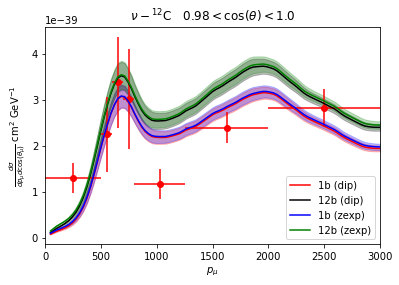

In [46]:
# plotting the data for nu
plt.errorbar(Tmu_nu_data_099, dsig_CC_nu_data_099, xerr=Tmu_nu_data_err_099, yerr=dsig_CC_nu_err_099, fmt="none", ecolor='red')
plt.plot(Tmu_nu_data_099, dsig_CC_nu_data_099,'ro')
# plotting dipole for nu
plt.plot(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_dip[:,0,0], 'red', label='1b (dip)')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_dip[:,1,0], dsig_nu_flux_1b_T2K_099_dip[:,2,0], alpha=0.25,color='red')
plt.plot(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_dip[:,0,0], 'black', label='12b (dip)')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_dip[:,1,0], dsig_nu_flux_12b_T2K_099_dip[:,2,0], alpha=0.25,color='black')
# plotting z-expansion for nu
plt.plot(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_zexp[:,0,0], 'blue', label='1b (zexp)')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_1b_T2K_099_zexp[:,1,0], dsig_nu_flux_1b_T2K_099_zexp[:,2,0], alpha=0.25,color='blue')
plt.plot(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_zexp[:,0,0], 'green', label='12b (zexp)')
plt.fill_between(pmu_T2K_099, dsig_nu_flux_12b_T2K_099_zexp[:,1,0], dsig_nu_flux_12b_T2K_099_zexp[:,2,0], alpha=0.25,color='green')

plt.xlim(0, 3000)
#plt.ylim(0,10**-38)
plt.legend(loc=0, ncol=1)#, bbox_to_anchor=(0.9, 1.0))
plt.title(r'$\nu - ^{12}$C   $0.98<\cos(\theta)<1.0$')
plt.xlabel(r'$p_\mu$')
plt.ylabel(r'$\frac{d\sigma}{dp_\mu d\cos(\theta_\mu)}$ cm$^2$ GeV$^{-1}$')

#plt.savefig('T2K_cross_section_099_no_data', bbox_inches='tight')
#plt.savefig('T2K_cross_section_099_with_data', bbox_inches='tight')

plt.show()